# <center>Titanic Survival Prediction</center>

## Importing libraries

In [601]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataframes

In [602]:
# Loading dataframe
df_gender = pd.read_csv(r'C:\Users\Prashant\Documents\Machine Learing Workspace\Titanic-Survival-Regression\.gitignore\gender_submission.csv')
df_test = pd.read_csv(r'C:\Users\Prashant\Documents\Machine Learing Workspace\Titanic-Survival-Regression\.gitignore\test.csv')
df_train = pd.read_csv(r'C:\Users\Prashant\Documents\Machine Learing Workspace\Titanic-Survival-Regression\.gitignore\train.csv')

## User defined functions

In [603]:
# UDF to determine the unique ticket status 
def unique_ticket_status(x):
    if(x > 1):
        unique=0
    else:
        unique=1
    return unique

In [604]:
# UDF to extract title from name
def extract_title(column):
    column = column.str.extract(' ([A-Za-z]+)\.', expand=False)
    return column 

In [605]:
## UDF to display the distribution of column after missing value treatment
def plot_age_distribution(before_imp , after_imp):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    sns.kdeplot(before_imp)
    plt.title("Age before imputation")
    plt.subplot(1, 2, 2) # index 2
    sns.kdeplot(after_imp)
    plt.title("Age after imputation")
    plt.show()

In [606]:
# UDF to calculate the MAPE for Age KPI to calculate accuracy
def mapeAge(dataframe,column,mean,median,mode):
    dataframe['mean_diff'] = (abs(dataframe.loc[:,column] - mean)/dataframe.loc[:,column])*100
    dataframe['median_diff'] = (abs(dataframe.loc[:,column] - median)/dataframe.loc[:,column])*100
    dataframe['mode_diff'] = (abs(dataframe.loc[:,column] - mode)/dataframe.loc[:,column])*100
    # dataframe['mean_age'] = mean
    # dataframe['median_age'] = median
    # dataframe['mode_age'] = mode
    print('Using mean , we are getting MAPE of ', round(np.mean(dataframe.loc[:,'mean_diff']),2))
    print('Using median , we are getting MAPE of ', round(np.mean(dataframe.loc[:,'median_diff']),2))
    print('Using mode , we are getting MAPE of ', round(np.mean(dataframe.loc[:,'mode_diff']),2),'\n')

In [607]:
# UDF to perform hot encoding on the labelled data
def hot_encoding(dataframe,column):
    encoded_df = pd.get_dummies(dataframe.loc[:,column], drop_first=True)
    frames = [dataframe,encoded_df]
    output_df = pd.concat(frames,axis=1)
    output_df.drop(columns=column,inplace=True)
    return output_df

In [608]:
# UDF to determine the travel class of passenger
def travel_class(column):
    column1 = column.apply(lambda x:'Tier 1' if(x == 1) else 'Tier 2' if (x==2) else 'Tier 3')
    return column1

In [609]:
# UDF to convert age into age brackets
def catgAge(x):
    if(x < 4):
        return 'Infant'
    elif(x >= 4 and x < 13):
        return 'Kid'
    elif(x >=13 and x < 20):
        return 'Teen'
    elif(x >=20 and x < 45):
        return 'Young'
    else:
        return 'Old'

## Creating ADF for manipulation

In [610]:
df_test_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


In [611]:
df_test_comp = df_test.merge(df_gender,how='left',on='PassengerId')
x = pd.concat([df_train,df_test_comp],ignore_index=True)
df_train = x.copy()
df_train[df_train['PassengerId']>891].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


In [612]:
df_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [613]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Null treatment

In [614]:
# Description of training data
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [615]:
# Total null count in dataframe
print(df_train.isna().sum()/len(df_train)*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64


In [616]:
# Determining the title of passengers
df_train['Title'] = extract_title(df_train['Name'])
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [617]:
# Cabin column has 687 rows out of 891 is blank(78%) with a lot of distinct values which wont impact the model
# Removing title from name because there are too many unique values which wont impact the prediction
df_train.drop(columns=['Name','Cabin'],inplace=True)

## Null tratment for age column using regression

<AxesSubplot:xlabel='Age', ylabel='Density'>

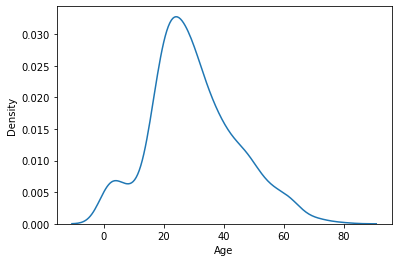

In [618]:
# Checking the distribution of age across the data
sns.kdeplot(df_train['Age'])

In [619]:
# It could be seen that there is very low correaltion between age and other columns so we cannot go for regression to predict the values for ages
df_train[~df_train['Age'].isna()].corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.006513,-0.064097,0.028814,-0.050700,-0.021096,0.047938
Survived,-0.006513,1.000000,-0.282080,-0.053695,0.011359,0.115358,0.239842
Pclass,-0.064097,-0.282080,1.000000,-0.408106,0.047221,0.017224,-0.565255
Age,0.028814,-0.053695,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.050700,0.011359,0.047221,-0.243699,1.000000,0.374456,0.141184
Parch,-0.021096,0.115358,0.017224,-0.150917,0.374456,1.000000,0.216723
Fare,0.047938,0.239842,-0.565255,0.178740,0.141184,0.216723,1.000000


In [620]:
# The next steps is to use measures of central tendency 
mean_age = round(df_train[~df_train['Age'].isna()].loc[:,'Age'].mean(),2)
median_age = df_train[~df_train['Age'].isna()].loc[:,'Age'].median()
mode_age = df_train[~df_train['Age'].isna()].loc[:,'Age'].mode()
print('Average age of passenger: ', mean_age)
print('Median age of the passenger: ',median_age)
print('Most of the passengers are of age:',mode_age)

Average age of passenger:  29.88
Median age of the passenger:  28.0
Most of the passengers are of age: 0    24.0
dtype: float64


In [621]:
### Method 2: Using measures of central tendency to determine accuracy
# Lets use each of these and determine which gives much better accuracy
df_age_accuracy = pd.DataFrame(df_train[~df_train['Age'].isna()].loc[:,'Age'])

# INSIGHT : Cannot use measures of central tendency because the MAPE is too high which means the predicted values is way too far than the actual. eg. Predicted = 24, actual =2 , MAPE = 1100% which is extremely wrong causing the overall MAPE to be 144%
mapeAge(df_age_accuracy,'Age',mean_age,median_age,24)

Using mean , we are getting MAPE of  159.78
Using median , we are getting MAPE of  149.38
Using mode , we are getting MAPE of  129.92 



In [622]:
### Method 3: Use the titles to determine average age and impute it
df_train.groupby(['Title'],as_index=False)['PassengerId'].count().sort_values('PassengerId', ascending=False)

# Categorising titles other than Mr, Mrs, Master, Miss into others
df_train['Title'] = df_train['Title'].apply(lambda x: x if ((x=='Mr') or (x=='Mrs') or (x=='Miss') or (x=='Master')) else 'Other')
df_train.groupby(['Title'],as_index=False)['PassengerId'].count().sort_values('PassengerId', ascending=False)

# The observation is that the mean and median of age for all tiles are close and so we can fill the age for na using the titles itself
import pandas as pd
pd.options.mode.chained_assignment = None 
titles = df_train['Title'].unique()
df_title_age = df_train[~df_train['Age'].isna()].loc[:,['Title','Age']]
for i in titles:
    mean_title = round(df_title_age[df_title_age['Title']==i].loc[:,'Age'].mean(),2)
    median_title = df_title_age[df_title_age['Title']==i].loc[:,'Age'].median()
    print('Mean for title ',i,' is ',mean_title)
    print('Median for title ',i,' is ',median_title)

    df_title_age_accuracy = df_title_age[df_title_age['Title'] ==i].iloc[:,:]
    mapeAge(df_title_age_accuracy, 'Age', mean_title, median_title , 0)

# INSIGHT : For Mr, Mrs and Others the error is around 30 percent which is acceptable but for Master and Miss , the rror is exceeding 100 percent which is incorrect and unacceptable

Mean for title  Mr  is  32.25
Median for title  Mr  is  29.0
Using mean , we are getting MAPE of  33.63
Using median , we are getting MAPE of  29.34
Using mode , we are getting MAPE of  100.0 

Mean for title  Mrs  is  36.99
Median for title  Mrs  is  35.5
Using mean , we are getting MAPE of  34.43
Using median , we are getting MAPE of  32.83
Using mode , we are getting MAPE of  100.0 

Mean for title  Miss  is  21.77
Median for title  Miss  is  22.0
Using mean , we are getting MAPE of  237.6
Using median , we are getting MAPE of  240.1
Using mode , we are getting MAPE of  100.0 

Mean for title  Master  is  5.48
Median for title  Master  is  4.0
Using mean , we are getting MAPE of  204.69
Using median , we are getting MAPE of  148.64
Using mode , we are getting MAPE of  100.0 

Mean for title  Other  is  42.66
Median for title  Other  is  44.5
Using mean , we are getting MAPE of  28.8
Using median , we are getting MAPE of  29.84
Using mode , we are getting MAPE of  100.0 



### Method 3 : Impute Age using sex and pclass 

In [623]:
age_by_pclass_sex = df_train.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(df_train['Age'].median()))

# Filling the missing values in Age with the medians of Sex and Pclass groups
x = df_train.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


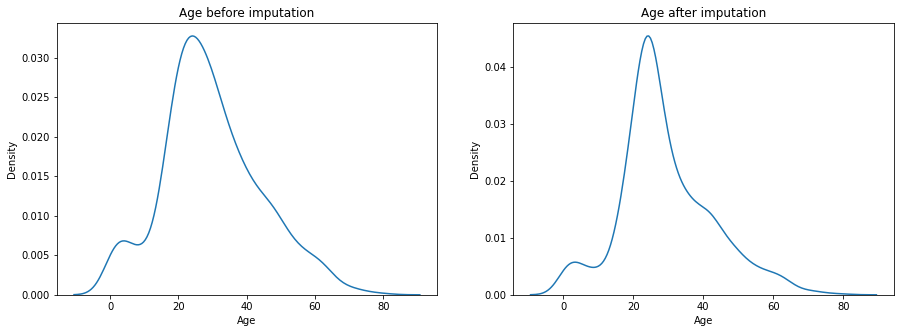

In [624]:
plot_age_distribution(df_train['Age'],x)

In [627]:
## Since the age distribution has remain same, we can impute the age columns using the median of sex and pclass
df_train['Age'] = df_train.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [628]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Embarked     1307 non-null   object 
 10  Title        1309 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 112.6+ KB


In [629]:
#  Converting age into age brackets
df_train['Age'] = df_train['Age'].apply(lambda x: catgAge(x))

## Categorical Variable Manipulation

### PClass, Embarked, Sex, Age column manipulation

In [630]:
# Determining the travel class of passengers
df_train['Pclass'] = travel_class(df_train['Pclass']) 
df_train['Pclass'].unique()

array(['Tier 3', 'Tier 1', 'Tier 2'], dtype=object)

In [631]:
df_train = hot_encoding(df_train,'Embarked')
df_train = hot_encoding(df_train,'Sex')
df_train = hot_encoding(df_train,'Pclass')
df_train = hot_encoding(df_train,'Title')
df_train = hot_encoding(df_train,'Age')
df_train.head()

,PassengerId,Survived,SibSp,Parch,Ticket,Fare,Q,S,male,Tier 2,Tier 3,Miss,Mr,Mrs,Other,Kid,Old,Teen,Young
0,1,0,1,0,A/5 21171,7.2500,0,1,1,0,1,0,1,0,0,0,0,0,1
1,2,1,1,0,PC 17599,71.2833,0,0,0,0,0,0,0,1,0,0,0,0,1
2,3,1,0,0,STON/O2. 3101282,7.9250,0,1,0,0,1,1,0,0,0,0,0,0,1
3,4,1,1,0,113803,53.1000,0,1,0,0,0,0,0,1,0,0,0,0,1
4,5,0,0,0,373450,8.0500,0,1,1,0,1,0,1,0,0,0,0,0,1


In [633]:
df_train.corr()

,PassengerId,Survived,SibSp,Parch,Fare,Q,S,male,Tier 2,Tier 3,Miss,Mr,Mrs,Other,Kid,Old,Teen,Young
PassengerId,1.000000,-0.020370,-0.055224,0.008942,0.031428,0.011585,-0.047923,0.013406,0.022714,-0.041544,-0.050389,0.014116,0.034473,0.002084,-0.015909,0.029548,-0.029675,0.014302
Survived,-0.020370,1.000000,0.002370,0.108919,0.233622,0.040950,-0.137103,-0.688371,0.048091,-0.242183,0.422198,-0.653221,0.426025,0.011581,0.039967,0.025778,0.029211,-0.094592
SibSp,-0.055224,0.002370,1.000000,0.373587,0.160238,-0.048678,0.075198,-0.109609,-0.052419,0.072610,0.079622,-0.243104,0.065098,-0.027496,0.273813,-0.038278,0.033371,-0.175008
Parch,0.008942,0.108919,0.373587,1.000000,0.221539,-0.100943,0.073258,-0.213125,-0.010057,0.019521,0.068368,-0.304780,0.217673,-0.050464,0.235596,-0.004567,0.010478,-0.181203
Fare,0.031428,0.233622,0.160238,0.221539,1.000000,-0.130059,-0.172683,-0.185523,-0.121384,-0.419752,0.090391,-0.192246,0.140518,0.038771,-0.011236,0.194152,-0.012416,-0.125713
Q,0.011585,0.040950,-0.048678,-0.100943,-0.130059,1.000000,-0.489874,-0.088651,-0.121973,0.243706,0.200610,-0.080224,-0.106257,-0.003207,-0.013020,-0.088552,-0.028873,0.106097
S,-0.047923,-0.137103,0.075198,0.073258,-0.172683,-0.489874,1.000000,0.119504,0.197973,-0.000181,-0.110725,0.112665,-0.021196,-0.049599,0.025273,-0.033617,0.036215,-0.025289
male,0.013406,-0.688371,-0.109609,-0.213125,-0.185523,-0.088651,0.119504,1.000000,-0.028862,0.116562,-0.669607,0.870678,-0.566111,0.031135,-0.049638,-0.010965,-0.065735,0.087377
Tier 2,0.022714,0.048091,-0.052419,-0.010057,-0.121384,-0.121973,0.197973,-0.028862,1.000000,-0.563180,-0.023529,-0.038595,0.069636,0.044745,-0.002044,-0.012301,-0.004495,-0.004640
Tier 3,-0.041544,-0.242183,0.072610,0.019521,-0.419752,0.243706,-0.000181,0.116562,-0.563180,1.000000,0.035259,0.117925,-0.178819,-0.167874,0.080069,-0.302596,0.061542,0.137018


### Ticket column manipulation

In [634]:
# While describing data, we got to know that ticket is not unique. So, in order to check the usability of the column, we might require manipulation
df_ticket_pass_count = df_train.groupby(['Ticket'],as_index=False)['PassengerId'].count().sort_values('PassengerId',ascending=False)

# Renaming the count of ticket column
df_ticket_pass_count.rename(columns={'Ticket':'Ticket','PassengerId':'Unique_ticket'},inplace=True)
df_ticket_pass_count.head(2)

,Ticket,Unique_ticket
778,CA. 2343,11
104,1601,8


<AxesSubplot:xlabel='Unique_ticket', ylabel='Density'>

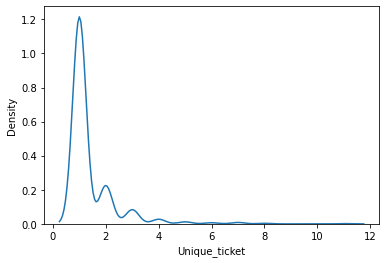

In [635]:
# Checking the distribution of unique tickets 
sns.kdeplot(df_ticket_pass_count['Unique_ticket'])

In [636]:
# Determining unique status of ticket
df_ticket_pass_count['Unique_ticket_status'] = df_ticket_pass_count['Unique_ticket'].apply(lambda x: 0 if x > 1 else 1)

In [637]:
# Removing the columns as it has been used to detemine unique ticket status
df_ticket_pass_count.drop(columns=['Unique_ticket'],inplace=True)

In [638]:
# Fetching the stauts of ticket in the original dataframe
df_train = df_train.merge(df_ticket_pass_count,how='left',on='Ticket')

In [639]:
df_train.head()

,PassengerId,Survived,SibSp,Parch,Ticket,Fare,Q,S,male,Tier 2,Tier 3,Miss,Mr,Mrs,Other,Kid,Old,Teen,Young,Unique_ticket_status
0,1,0,1,0,A/5 21171,7.2500,0,1,1,0,1,0,1,0,0,0,0,0,1,1
1,2,1,1,0,PC 17599,71.2833,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,1,0,0,STON/O2. 3101282,7.9250,0,1,0,0,1,1,0,0,0,0,0,0,1,1
3,4,1,1,0,113803,53.1000,0,1,0,0,0,0,0,1,0,0,0,0,1,0
4,5,0,0,0,373450,8.0500,0,1,1,0,1,0,1,0,0,0,0,0,1,1


### Sibling and Parent column manipulation

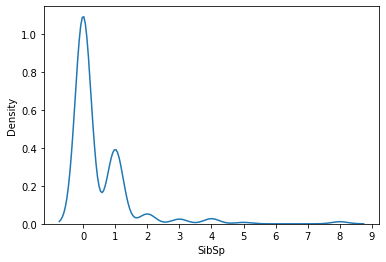

In [640]:
# Sibling count distribution
ax = sns.kdeplot(df_train['SibSp'])
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
plt.show()

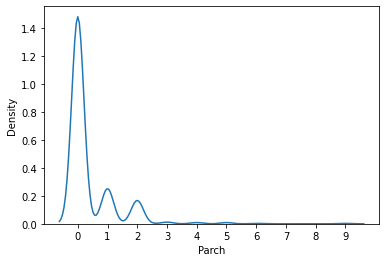

In [641]:
# Sibling count distribution
ax = sns.kdeplot(df_train['Parch'])
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
plt.show()

In [642]:
# From both the distribution above, we can categorize siblings and parents into one single feature that whether parent/sibling is present or not
df_train['Sibling_present'] = df_train.loc[:,'SibSp'].apply(lambda x : 0 if x==0 else 1)
df_train['Parent_present'] = df_train.loc[:,'SibSp'].apply(lambda x : 0 if x==0 else 1)

In [645]:
df_train.drop(columns=['SibSp','Parch','Ticket','Fare'],inplace=True)
df_train.head()

,PassengerId,Survived,Q,S,male,Tier 2,Tier 3,Miss,Mr,Mrs,Other,Kid,Old,Teen,Young,Unique_ticket_status,Sibling_present,Parent_present
0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,1,1,1
1,2,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1
2,3,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0
3,4,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1
4,5,0,0,1,1,0,1,0,1,0,0,0,0,0,1,1,0,0


In [646]:
# The data is properly classified betwen survived and died passnegers
df_train.groupby(['Survived'],as_index=False)['PassengerId'].count()

,Survived,PassengerId
0,0,815
1,1,494


## Applying manipulations on test data

In [651]:
# # Determining the title of passengers
# df_test['Title'] = extract_title(df_test['Name'])
# df_test.drop(columns=['Name','Cabin'],inplace=True)
# # Determining the travel class of passengers
# df_test['Pclass'] = travel_class(df_test['Pclass']) 
# # Categorising titles other than Mr, Mrs, Master, Miss into others
# df_test['Title'] = df_test['Title'].apply(lambda x: x if ((x=='Mr') or (x=='Mrs') or (x=='Miss') or (x=='Master')) else 'Other')
# df_test.groupby(['Title'],as_index=False)['PassengerId'].count().sort_values('PassengerId', ascending=False)
# ## Since the age distribution has remain same, we can impute the age columns using the median of sex and pclass
# df_test['Age'] = df_test.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
# # Encoding categorical variable
# df_test = hot_encoding(df_test,'Embarked')
# df_test = hot_encoding(df_test,'Sex')
# df_test = hot_encoding(df_test,'Pclass')
# df_test = hot_encoding(df_test,'Title')
# # While describing data, we got to know that ticket is not unique. So, in order to check the usability of the column, we might require manipulation
# df_ticket_pass_count = df_test.groupby(['Ticket'],as_index=False)['PassengerId'].count().sort_values('PassengerId',ascending=False)
# # Renaming the count of ticket column
# df_ticket_pass_count.rename(columns={'Ticket':'Ticket','PassengerId':'Unique_ticket'},inplace=True)
# # Determining unique status of ticket
# df_ticket_pass_count['Unique_ticket_status'] = df_ticket_pass_count['Unique_ticket'].apply(lambda x: 0 if x > 1 else 1)
# # Removing the columns as it has been used to detemine unique ticket status
# df_ticket_pass_count.drop(columns=['Unique_ticket'],inplace=True)
# # Fetching the stauts of ticket in the original dataframe
# df_test = df_test.merge(df_ticket_pass_count,how='left',on='Ticket')
# # From both the distribution above, we can categorize siblings and parents into one single feature that whether parent/sibling is present or not
# df_test['Sibling_present'] = df_test.loc[:,'SibSp'].apply(lambda x : 0 if x==0 else 1)
# df_test['Parent_present'] = df_test.loc[:,'SibSp'].apply(lambda x : 0 if x==0 else 1)
# df_test.drop(columns=['SibSp','Parch','Ticket','Fare'],inplace=True)
# df_test.head()

## Modeling 

In [693]:
from sklearn.model_selection import train_test_split
drop_cols=['Survived', 'PassengerId']
X_train,X_test,y_train,y_test = train_test_split(df_train.iloc[:,2:],df_train.iloc[:,1],test_size=0.33, random_state=1)
print('xtrain shape: {}'.format(X_train.shape))
print('ytrain shape: {}'.format(y_train.shape))
print('xtest shape: {}'.format(X_test.shape))
print('ytest shape: {}'.format(y_test.shape))

xtrain shape: (877, 16)
ytrain shape: (877,)
xtest shape: (432, 16)
ytest shape: (432,)


In [695]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [696]:
y_pred = classifier.predict(ytrain)

In [697]:
#from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[229  27]
 [ 46 130]]


In [698]:
from sklearn.metrics import accuracy_score
print ("Accuracy of logistic regression : ", round(accuracy_score(ytest, y_pred)*100,2))

Accuracy of logistic regression :  83.1


In [699]:
 from sklearn.model_selection import learning_curve
 x = df_train.iloc[:,2:]
 y = df_train.iloc[:,1]
 train_sizes, train_scores, test_scores = learning_curve(classifier, x, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

In [700]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

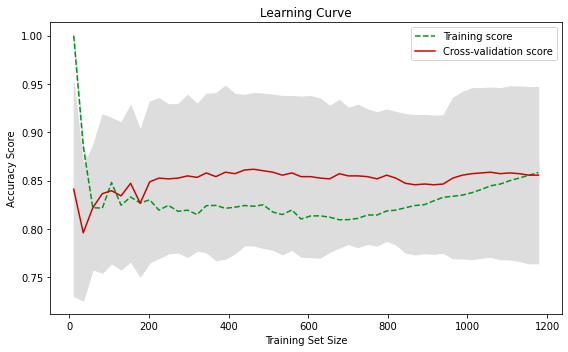

In [701]:
plt.subplots(1, figsize=(8,5))
plt.plot(train_sizes, train_mean, '--', color="#039420",  label="Training score")
plt.plot(train_sizes, test_mean, color="#c70404", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [707]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
print('Training accuracy using SVM is ',round(svc.score(X_train, y_train) * 100, 2))
print('Test accuracy using SVM is ',round(accuracy_score(y_test,Y_pred)*100,2))

Training accuracy using SVM is  88.14
Test accuracy using SVM is  84.03


In [710]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
print('Training accuracy using SVM is ',round(knn.score(X_train, y_train) * 100, 2))
print('Test accuracy using SVM is ',round(accuracy_score(y_test,Y_pred)*100,2))

Training accuracy using SVM is  87.8
Test accuracy using SVM is  82.64
